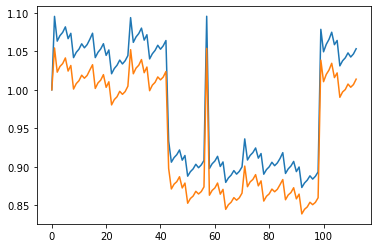

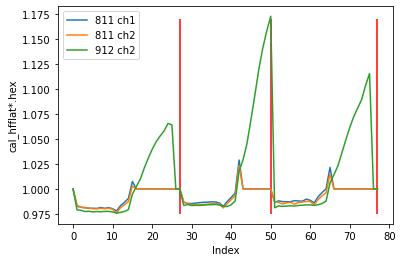

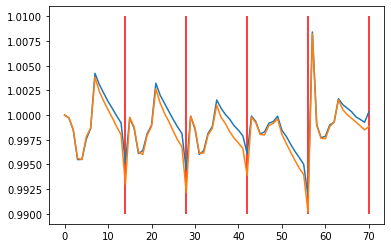

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import os

fn0 = r'C:\Users\zqiu\dgpro'
plt.figure()
with open(os.path.join(fn0, 'cal_ac1.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_ac2.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
plt.figure()
with open(os.path.join(fn0, 'cal_hfflat1.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_hfflat2.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_hfflat2_900.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
plt.vlines([27, 50, 77], ymin=0.975, ymax=1.17, colors='r')
plt.xlabel('Index')
plt.ylabel('cal_hfflat*.hex')
plt.legend(['811 ch1','811 ch2', '912 ch2'], loc="upper left")
plt.figure()
with open(os.path.join(fn0, 'cal_lfflat1.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_lfflat2.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
plt.vlines([14, 28, 42, 56, 70], ymin=0.99, ymax=1.01, colors='r')

In [ ]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time
rm = pyvisa.ResourceManager()
gen = rm.open_resource('TCPIP0::192.168.138.178::INSTR')
print(gen.query("*IDN?"))
osc = rm.open_resource('TCPIP0::192.168.138.244::INSTR')
print(osc.query("*IDN?"))

In [334]:
2*np.sqrt(2) * np.sqrt(0.05) * np.sqrt(np.power(10.0, 0 / 10.0)) * 10000000.0 #0dBm = 0.632
2*np.sqrt(2) * np.sqrt(0.05) * np.sqrt(np.power(10.0, 0 / 10.0)) * 10000000.0 /0.632/1e6 #0dBm = 0.632, unit in 1e-7 V
# HF RNGS
#rng3, 50, 77
print(6324556.0*1e-7)
# rng 27, 49
print(50000000.0*1e-7)
# rng 27, 49
print(12649111.0*1e-7)

0.6324556
5.0
1.2649111


In [ ]:
import pyvisa
import numpy as np
import matplotlib.pyplot as plt
import time
rm = pyvisa.ResourceManager()
gen = rm.open_resource('TCPIP0::192.168.138.178::INSTR')
print(gen.query("*IDN?"))
osc = rm.open_resource('TCPIP0::192.168.138.244::INSTR')
print(osc.query("*IDN?"))

In [345]:
nn=2
volt=0.6324556

fx = np.array(list(reversed([200000000000000,
175000000000000,
150000000000000,
120000000000000,
100000000000000,
90000000000000,
80000000000000,
70000000000000,
60000000000000,
50000000000000,
40000000000000,
30000000000000,
20000000000000,
10000000000000,
8000000000000,
6000000000000,
4000000000000,
2000000000000,
1000000000000,
900000000000,
800000000000,
700000000000,
600000000000,
500000000000,
400000000000,
300000000000,
200000000000])))/1e6

fs = fx
amp = np.zeros_like(fs)
st = ":SOURce{}:VOLT {:.7e}".format(nn,volt)
# print(st)
gen.write(st)
time.sleep(3)
for n,f in enumerate(fs):
    st = ":SOURce{}:FREQuency {:.4e}".format(nn,f)
    # print(st)
    gen.write(st)
    time.sleep(0.7)
    amp[n] = float(osc.query(":MEAS:ITEM? VRMS,CHAN1"))
    print(n,f,amp[n])

np.savez('ch{}-rng3-over-original.npz'.format(nn),n=n,fs=fs,amp=amp,ref=(volt*1/(2*2*np.sqrt(2))))

0 200000.0 0.1114
1 300000.0 0.1106
2 400000.0 0.1105
3 500000.0 0.1106
4 600000.0 0.1106
5 700000.0 0.1104
6 800000.0 0.1105
7 900000.0 0.1105
8 1000000.0 0.1106
9 2000000.0 0.1104
10 4000000.0 0.11
11 6000000.0 0.1104
12 8000000.0 0.1105
13 10000000.0 0.1105
14 20000000.0 0.11
15 30000000.0 0.107
16 40000000.0 0.1057
17 50000000.0 0.104
18 60000000.0 0.1022
19 70000000.0 0.1006
20 80000000.0 0.09907
21 90000000.0 0.09774
22 100000000.0 0.09655
23 120000000.0 0.09463
24 150000000.0 0.09234
25 175000000.0 0.09112
26 200000000.0 0.08986


In [344]:
nn=2
volt=5

fx = np.array(list(reversed([
100000000000000,
90000000000000,
80000000000000,
70000000000000,
60000000000000,
50000000000000,
40000000000000,
30000000000000,
20000000000000,
10000000000000,
8000000000000,
6000000000000,
4000000000000,
2000000000000,
1000000000000,
900000000000,
800000000000,
700000000000,
600000000000,
500000000000,
400000000000,
300000000000,
200000000000])))/1e6

fs = fx
amp = np.zeros_like(fs)
st = ":SOURce{}:FREQuency {:.4e}".format(nn,fs[0])
# print(st)
gen.write(st)
time.sleep(0.7)
st = ":SOURce{}:VOLT {:.7e}".format(nn,volt)
# print(st)
gen.write(st)
time.sleep(3)
for n,f in enumerate(fs):
    st = ":SOURce{}:FREQuency {:.4e}".format(nn,f)
    # print(st)
    gen.write(st)
    time.sleep(0.7)
    amp[n] = float(osc.query(":MEAS:ITEM? VRMS,CHAN1"))
    print(n,f,amp[n])

np.savez('ch{}-rng2-over-original.npz'.format(nn),n=n,fs=fs,amp=amp,ref=(volt*1/(2*2*np.sqrt(2))))

0 200000.0 0.92
1 300000.0 0.9139
2 400000.0 0.9136
3 500000.0 0.913
4 600000.0 0.9126
5 700000.0 0.9129
6 800000.0 0.9127
7 900000.0 0.9134
8 1000000.0 0.9131
9 2000000.0 0.9114
10 4000000.0 0.9083
11 6000000.0 0.9106
12 8000000.0 0.9113
13 10000000.0 0.9106
14 20000000.0 0.9072
15 30000000.0 0.8709
16 40000000.0 0.8542
17 50000000.0 0.8322
18 60000000.0 0.8107
19 70000000.0 0.7894
20 80000000.0 0.7696
21 90000000.0 0.7552
22 100000000.0 0.7426


In [342]:
nn=2
volt=1.2649111

fx = np.array(list(reversed([200000000000000,
175000000000000,
150000000000000,
120000000000000,
100000000000000,
90000000000000,
80000000000000,
70000000000000,
60000000000000,
50000000000000,
40000000000000,
30000000000000,
20000000000000,
10000000000000,
8000000000000,
6000000000000,
4000000000000,
2000000000000,
1000000000000,
900000000000,
800000000000,
700000000000,
600000000000,
500000000000,
400000000000,
300000000000,
200000000000])))/1e6

fs = fx
amp = np.zeros_like(fs)
st = ":SOURce{}:VOLT {:.7e}".format(nn,volt)
# print(st)
gen.write(st)
time.sleep(3)
for n,f in enumerate(fs):
    st = ":SOURce{}:FREQuency {:.4e}".format(nn,f)
    # print(st)
    gen.write(st)
    time.sleep(0.7)
    amp[n] = float(osc.query(":MEAS:ITEM? VRMS,CHAN1"))
    print(n,f,amp[n])

np.savez('ch{}-rng1-over-original.npz'.format(nn),n=n,fs=fs,amp=amp,ref=(volt*1/(2*2*np.sqrt(2))))

0 200000.0 0.2256
1 300000.0 0.223
2 400000.0 0.2226
3 500000.0 0.2225
4 600000.0 0.2222
5 700000.0 0.222
6 800000.0 0.2222
7 900000.0 0.222
8 1000000.0 0.222
9 2000000.0 0.2217
10 4000000.0 0.2207
11 6000000.0 0.2215
12 8000000.0 0.2216
13 10000000.0 0.2216
14 20000000.0 0.2207
15 30000000.0 0.2173
16 40000000.0 0.2149
17 50000000.0 0.2118
18 60000000.0 0.2088
19 70000000.0 0.206
20 80000000.0 0.2036
21 90000000.0 0.2013
22 100000000.0 0.1995
23 120000000.0 0.1967
24 150000000.0 0.1941
25 175000000.0 0.1936
26 200000000.0 0.1933


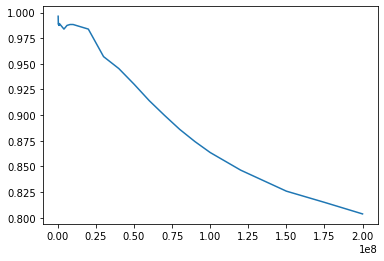

In [346]:
plt.plot(fs,amp*1/(volt*1/(2*2*np.sqrt(2))))

[False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True]
27 27
28 51
51 78


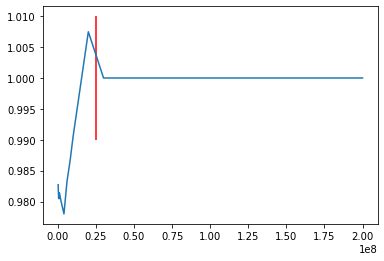

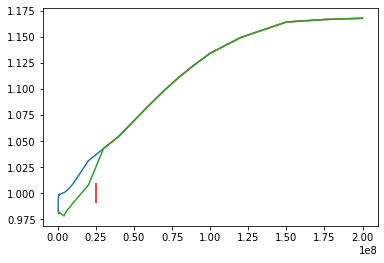

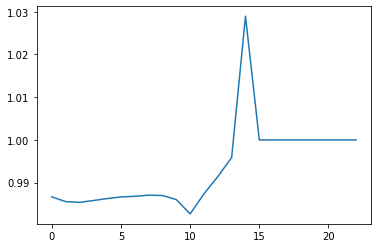

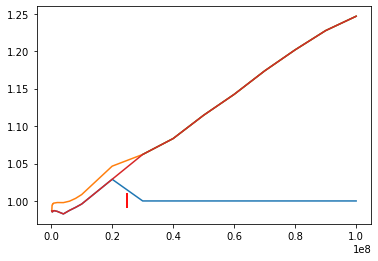

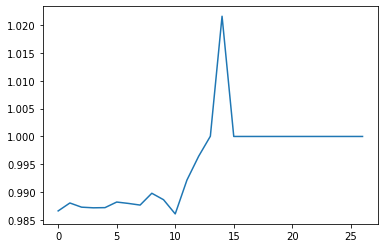

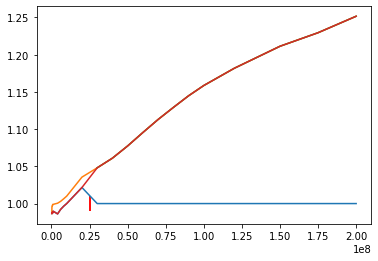

In [355]:
fn0 = r'C:\Users\xxx\dgpro'
with open(os.path.join(fn0, 'cal_hfflat1.hex'), 'rb') as fh:
    aoriginal1=np.fromfile(fh, dtype='<f8', sep='')

section_start = 1
section_length = len(fx)
aoriginal1_section_1 = aoriginal1[section_start:(section_length+section_start)]
plt.figure()
plt.plot(fx, aoriginal1_section_1)
plt.vlines([25e6], 0.99, 1.01, 'r')
respori = np.load('ch1-rng1-over-original.npz')

print(fx>25e6)
nchg = 12
sel =  section_length-nchg
selm = section_length
plt.figure()
print(selm,len(aoriginal1_section_1))
newcal = aoriginal1_section_1/(respori["amp"]/respori["amp"][0])
plt.plot(fx, newcal)
plt.plot(fx[sel:selm], newcal[sel:selm])
plt.vlines([25e6], 0.99, 1.01, 'r')
aoriginal1_mod = aoriginal1.copy()
aoriginal1_mod[sel+1:selm+1]  = newcal[sel:selm]
plt.plot(fx, aoriginal1_mod[section_start:(section_length+section_start)])

section_start += section_length
print(section_start,(section_length+section_start-4))
aoriginal1_section_2 = aoriginal1[section_start:(section_length+section_start-4)]
plt.figure()
plt.plot( aoriginal1[section_start:(section_length+section_start-4)])
plt.figure()
plt.plot(fx[:-4], aoriginal1_section_2)
plt.vlines([25e6], 0.99, 1.01, 'r')
respori = np.load('ch1-rng2-over-original.npz')
newcal = aoriginal1_section_2/(respori["amp"]/respori["amp"][0])
sel =  section_length-nchg
selm = section_length-4
plt.plot(fx[:-4], newcal)
plt.plot(fx[sel:selm], newcal[sel:selm])
plt.vlines([25e6], 0.99, 1.01, 'r')
aoriginal1_mod[sel+section_start:selm+section_start]  = newcal[sel:selm]
plt.plot(fx[:-4], aoriginal1_mod[28:51])

section_start += section_length -4
print(section_start,(section_length+section_start))
aoriginal1_section_3 = aoriginal1[section_start:(section_length+section_start)]
plt.figure()
plt.plot( aoriginal1[section_start:(section_length+section_start)])
plt.figure()
plt.plot(fx[:], aoriginal1_section_3)
plt.vlines([25e6], 0.99, 1.01, 'r')
respori = np.load('ch1-rng3-over-original.npz')
newcal = aoriginal1_section_3/(respori["amp"]/respori["amp"][0])[:]
sel =  section_length-nchg
selm = section_length
plt.plot(fx[:], newcal)
plt.plot(fx[sel:selm], newcal[sel:selm])
plt.vlines([25e6], 0.99, 1.01, 'r')
aoriginal1_mod[sel+section_start:selm+section_start]  = newcal[sel:selm]
plt.plot(fx[:], aoriginal1_mod[51:78])


with open(os.path.join(fn0, 'cal_hfflat1_mod.hex'), 'wb') as fh:
    aoriginal1_mod.tofile(fh)

[False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True]
27 27
28 51
51 78


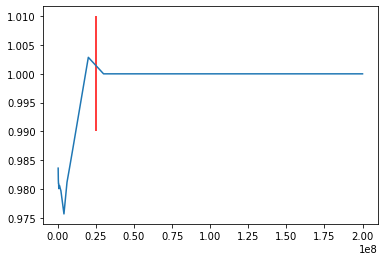

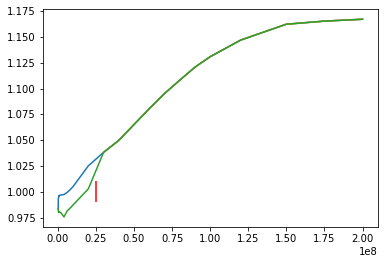

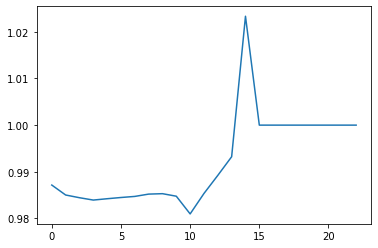

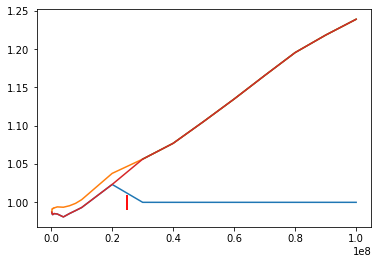

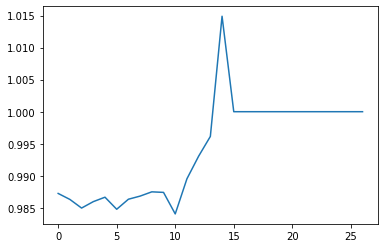

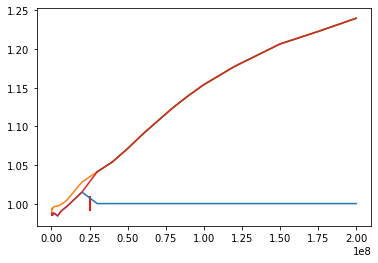

In [356]:
fn0 = r'C:\Users\xxx\dgpro'
with open(os.path.join(fn0, 'cal_hfflat2.hex'), 'rb') as fh:
    aoriginal1=np.fromfile(fh, dtype='<f8', sep='')

section_start = 1
section_length = len(fx)
aoriginal1_section_1 = aoriginal1[section_start:(section_length+section_start)]
plt.figure()
plt.plot(fx, aoriginal1_section_1)
plt.vlines([25e6], 0.99, 1.01, 'r')
respori = np.load('ch2-rng1-over-original.npz')

print(fx>25e6)
nchg = 12
sel =  section_length-nchg
selm = section_length
plt.figure()
print(selm,len(aoriginal1_section_1))
newcal = aoriginal1_section_1/(respori["amp"]/respori["amp"][0])
plt.plot(fx, newcal)
plt.plot(fx[sel:selm], newcal[sel:selm])
plt.vlines([25e6], 0.99, 1.01, 'r')
aoriginal1_mod = aoriginal1.copy()
aoriginal1_mod[sel+1:selm+1]  = newcal[sel:selm]
plt.plot(fx, aoriginal1_mod[section_start:(section_length+section_start)])

section_start += section_length
print(section_start,(section_length+section_start-4))
aoriginal1_section_2 = aoriginal1[section_start:(section_length+section_start-4)]
plt.figure()
plt.plot( aoriginal1[section_start:(section_length+section_start-4)])
plt.figure()
plt.plot(fx[:-4], aoriginal1_section_2)
plt.vlines([25e6], 0.99, 1.01, 'r')
respori = np.load('ch2-rng2-over-original.npz')
newcal = aoriginal1_section_2/(respori["amp"]/respori["amp"][0])
sel =  section_length-nchg
selm = section_length-4
plt.plot(fx[:-4], newcal)
plt.plot(fx[sel:selm], newcal[sel:selm])
plt.vlines([25e6], 0.99, 1.01, 'r')
aoriginal1_mod[sel+section_start:selm+section_start]  = newcal[sel:selm]
plt.plot(fx[:-4], aoriginal1_mod[28:51])

section_start += section_length -4
print(section_start,(section_length+section_start))
aoriginal1_section_3 = aoriginal1[section_start:(section_length+section_start)]
plt.figure()
plt.plot( aoriginal1[section_start:(section_length+section_start)])
plt.figure()
plt.plot(fx[:], aoriginal1_section_3)
plt.vlines([25e6], 0.99, 1.01, 'r')
respori = np.load('ch2-rng3-over-original.npz')
newcal = aoriginal1_section_3/(respori["amp"]/respori["amp"][0])[:]
sel =  section_length-nchg
selm = section_length
plt.plot(fx[:], newcal)
plt.plot(fx[sel:selm], newcal[sel:selm])
plt.vlines([25e6], 0.99, 1.01, 'r')
aoriginal1_mod[sel+section_start:selm+section_start]  = newcal[sel:selm]
plt.plot(fx[:], aoriginal1_mod[51:78])

with open(os.path.join(fn0, 'cal_hfflat2_mod.hex'), 'wb') as fh:
    aoriginal1_mod.tofile(fh)

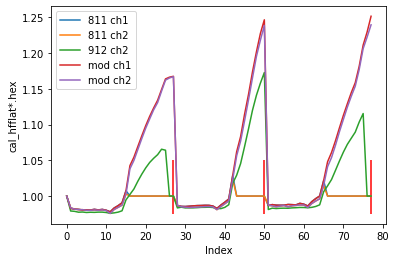

In [371]:

plt.figure()
with open(os.path.join(fn0, 'cal_hfflat1.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_hfflat2.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_hfflat2_900.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_hfflat1_mod.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
with open(os.path.join(fn0, 'cal_hfflat2_mod.hex'), 'rb') as fh:
    a=np.fromfile(fh, dtype='<f8', sep='')
plt.plot(a)
plt.vlines([27, 50, 77], ymin=0.975, ymax=1.05, colors='r')
plt.xlabel('Index')
plt.ylabel('cal_hfflat*.hex')
plt.legend(['811 ch1','811 ch2', '912 ch2', 'mod ch1', 'mod ch2'], loc="upper left")

adb -s 192.168.138.178:55555 push .\cal_hfflat1_mod.hex /rigol/data/cal_hfflat1.hex

adb -s 192.168.138.178:55555 push .\cal_hfflat2_mod.hex /rigol/data/cal_hfflat2.hex